l(X;Y) = H(X) - H(X|Y) -> conditional entropy

lower information gain means they are much dependent, if higher information gain means they are related

to each other

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest

In [2]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [4]:
df.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

In [5]:
x = df.drop('Wine',axis=1)
y = df.pop('Wine')
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [6]:
mutual_info = mutual_info_classif(x_train,y_train)

<AxesSubplot:>

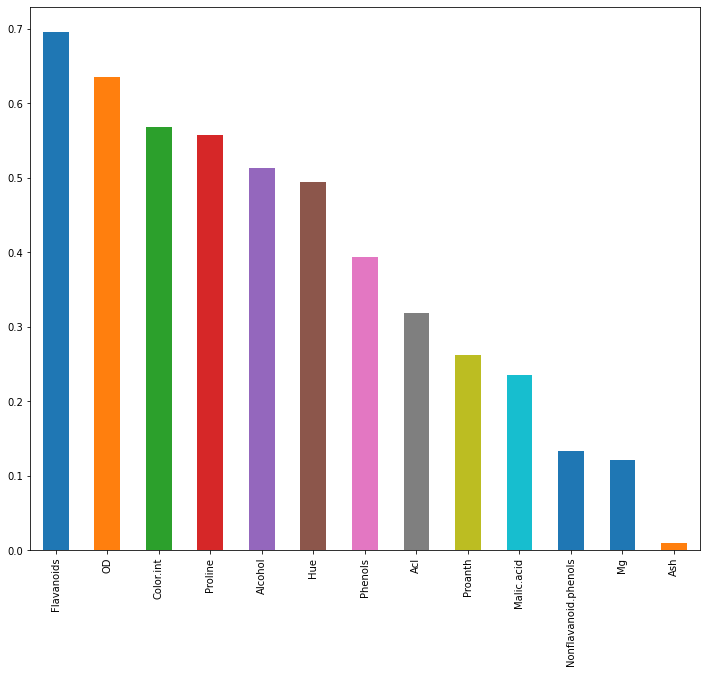

In [7]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False).plot(kind='bar',figsize=(12,10))

In [8]:
top_five_cols = SelectKBest(mutual_info_classif,k=5)
top_five_cols.fit(x_train,y_train)
top_five_cols.get_support()

array([ True, False, False, False, False, False,  True, False, False,
        True, False,  True,  True])

In [9]:
drop_cols = x_train.columns[top_five_cols.get_support() == False]
x_train.drop(drop_cols,axis=1)

,Alcohol,Flavanoids,Color.int,OD,Proline
95,12.47,2.27,2.60,2.63,937
91,12.00,1.25,3.60,2.65,450
24,13.50,2.61,3.52,3.82,845
109,11.61,2.92,2.65,3.26,680
121,11.56,5.08,6.00,3.69,465
21,12.93,2.41,4.50,3.52,770
176,13.17,0.68,9.30,1.62,840
63,12.37,3.10,4.45,2.87,420
58,13.72,3.67,6.80,2.87,1285
99,12.29,2.99,2.30,2.83,406
